1. Change the number of observations to 100,000 and see what happens.

use the same model.
f(x,z) = 2x - 3z + 5 + noise

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [4]:
observations = 100000

xs = np.random.uniform(-10,10,(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

noise = np.random.uniform(-1,1,(observations,1))

generated_inputs = np.column_stack((xs,zs))
generated_targets = 2*xs - 3*zs + 5 - noise


In [5]:
generated_inputs.shape

(100000, 2)

In [7]:
generated_targets.shape

(100000, 1)

In [10]:
np.savez('tf_exp01', inputs = generated_inputs, targets = generated_targets)

Let's start to build our model with tensorflow

In [12]:
training_data = np.load('tf_exp01.npz')

In [8]:
# Declare inputs (variable in weights (x1,x2)) and outputs size (output_var like y)
inputs_size = 2
outputs_size = 1

In [17]:
model = tf.keras.Sequential([
                            tf.keras.layers.Dense(outputs_size,
                                                  kernel_initializer = tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                  bias_initializer = tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                  )


                            ])

In [18]:
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

In [20]:
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')
model.fit(training_data['inputs'], training_data['targets'], epochs = 100, verbose = 2)

Epoch 1/100
3125/3125 - 3s - loss: 0.9017 - 3s/epoch - 1ms/step
Epoch 2/100
3125/3125 - 3s - loss: 0.3847 - 3s/epoch - 868us/step
Epoch 3/100
3125/3125 - 3s - loss: 0.3799 - 3s/epoch - 815us/step
Epoch 4/100
3125/3125 - 3s - loss: 0.3826 - 3s/epoch - 831us/step
Epoch 5/100
3125/3125 - 3s - loss: 0.3831 - 3s/epoch - 828us/step
Epoch 6/100
3125/3125 - 3s - loss: 0.3774 - 3s/epoch - 1ms/step
Epoch 7/100
3125/3125 - 3s - loss: 0.3795 - 3s/epoch - 838us/step
Epoch 8/100
3125/3125 - 3s - loss: 0.3795 - 3s/epoch - 834us/step
Epoch 9/100
3125/3125 - 3s - loss: 0.3802 - 3s/epoch - 841us/step
Epoch 10/100
3125/3125 - 3s - loss: 0.3806 - 3s/epoch - 937us/step
Epoch 11/100
3125/3125 - 3s - loss: 0.3824 - 3s/epoch - 911us/step
Epoch 12/100
3125/3125 - 3s - loss: 0.3797 - 3s/epoch - 835us/step
Epoch 13/100
3125/3125 - 3s - loss: 0.3804 - 3s/epoch - 828us/step
Epoch 14/100
3125/3125 - 3s - loss: 0.3813 - 3s/epoch - 818us/step
Epoch 15/100
3125/3125 - 4s - loss: 0.3834 - 4s/epoch - 1ms/step
Epoch 16/1

KeyboardInterrupt: ignored

In [21]:
weights = model.layers[0].get_weights()[0]
bias = model.layers[0].get_weights()[1]


In [23]:
print(weights, bias)

[[ 2.0158665]
 [-3.0035675]] [5.031528]


In [25]:
targets_hat = model.predict_on_batch(training_data['inputs']).round(1)

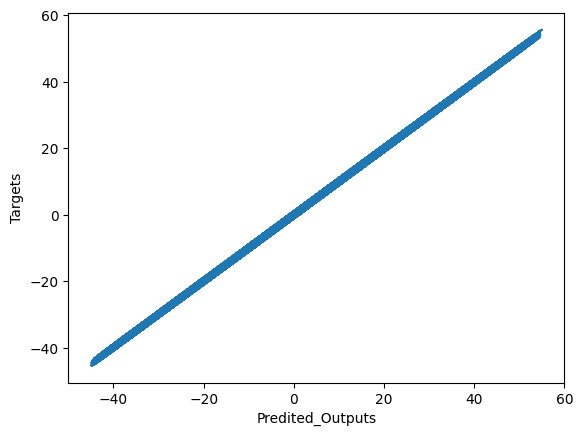

In [26]:
import matplotlib.pyplot as plt
plt.plot(np.squeeze(targets_hat), np.squeeze(training_data['targets']))
plt.xlabel('Predited_Outputs')
plt.ylabel('Targets')
plt.show()

ariable "observations" and change it to 100000, instead of 1000.

Here are some takeaways:
1. It takes the algorithm more time to solve the problem.
2. No further adjustments are needed, as all the code is written irrespeective of the number of observations
3. The result is the same as we the loss was scaled (the mean_squared_loss, so the average L2-norm).
4. The loss starts oscillating at some point.
4. matplotlib may not be able to plot the data, as there are too many points.